## Lectura y gráfica de una Señal

### Importación de librerias

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from scipy import signal

##### Abrir archivo txt

In [12]:
f = open("SenalECG/ECG_Prosim_ejercicio.txt","r")
raw_data = f.readlines()[1] # con f.read() leemos todo el contenido
f.close()

raw_data

'# {"98:D3:71:FD:62:1E": {"position": 0, "device": "bitalino_rev", "device name": "98:D3:71:FD:62:1E", "device connection": "BTH98:D3:71:FD:62:1E", "sampling rate": 1000, "resolution": [4, 1, 1, 1, 1, 10], "firmware version": 1282, "comments": "", "keywords": "", "mode": 0, "sync interval": 2, "date": "2023-9-15", "time": "10:7:58.499", "channels": [2], "sensor": ["ECGBIT"], "label": ["A2"], "column": ["nSeq", "I1", "I2", "O1", "O2", "A2"], "special": [{}], "digital IO": [0, 0, 1, 1]}}\n'

In [13]:
x = re.findall("[0-5][0-9][0-9]\d", raw_data)

print(x)

['1000', '1282', '2023']


In [14]:
Fs = float(x[0])
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=1000.0 hz
 Ts=0.001 s


## Leer archivo excluyendo 2 primeras filas

In [15]:
Senalparo = np.genfromtxt("SenalECG/Señales_de_paro_Prosim.txt", delimiter="\t",skip_header = 3)
SenalEjercicio = np.genfromtxt("SenalECG/ECG_Prosim_ejercicio.txt", delimiter="\t", skip_header=3)

## Visualización de la señal

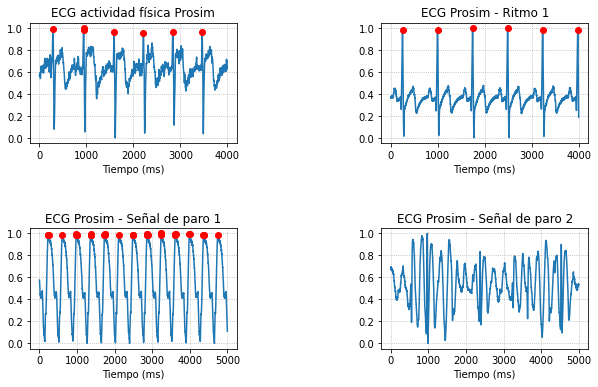

In [18]:
#Señal en en paro -
aux = (Senalparo[:, 5])
y1 = (SenalEjercicio[:, 5])
y1 = y1[0:4000]
y2 = aux[20000:24000]
y3 = aux[40000:45000]
y4 = aux[60000:65000]

#Señal de actividad física - Normalizacion
y1 = y1 - np.min(y1)
y1 = y1 / np.max(y1)
t1 = (np.arange(0,len(y1)) / Fs)
ind_peaks1, _ = signal.find_peaks(y1, height= 0.9)
ind_time1 = t1[ind_peaks1]

#Señal de paro 1 - Normalizacion
y2 = y2  - np.min(y2)
y2 = y2 / np.max(y2)
t2 = (np.arange(0,len(y2)) / Fs)
ind_peaks2, _ = signal.find_peaks(y2, height= 0.9)
ind_time2 = t2[ind_peaks2]

#Señal de paro 2 - Normalizacion
y3 = y3  - np.min(y3)
y3 = y3 / np.max(y3)
t3 = (np.arange(0,len(y3)) / Fs)
ind_peaks3, _ = signal.find_peaks(y3, height= 0.98)
ind_time3 = t3[ind_peaks3]

#Señal de paro 3 - Normalizacion
y4 = y4  - np.min(y4)
y4 = y4 / np.max(y4)
t4 = (np.arange(0,len(y4)) / Fs)
ind_peaks4, _ = signal.find_peaks(y4, height= 0.9)
ind_time4 = t4[ind_peaks4]

#Graficos señales
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.7)
plt.plot(y1, label="señal Reposo") 
plt.plot(ind_peaks1, y1[ind_peaks1], 'ro')
plt.title("ECG actividad física Prosim")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (ms)")

plt.subplot(2,2,2)
plt.plot(y2, label="señal Reposo") 
plt.plot(ind_peaks2, y2[ind_peaks2], 'ro')
plt.title("ECG Prosim - Ritmo 1")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (ms)")

plt.subplot(2,2,3)
plt.plot(y3, label="señal Reposo") 
plt.plot(ind_peaks3, y3[ind_peaks3], 'ro')
plt.title("ECG Prosim - Señal de paro 1")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (ms)")

plt.subplot(2,2,4)
plt.plot(y4, label="señal Reposo") 
plt.title("ECG Prosim - Señal de paro 2")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (ms)")

fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('ECG_Prosim_comparison.png', transparent=False, )
plt.show()

#### Hallando la frecuencia cardíaca

In [61]:
fc1 = int(60 / (np.diff(ind_peaks1[0:2]) * (1/Fs)))
fc2 = int(60 / (np.diff(ind_peaks2[0:2]) * (1/Fs)))
fc3 = int(60 / (np.diff(ind_peaks3[2:4]) * (1/Fs)))

print(f"La frecuencia cardiaca simulada después de actividad física es: {fc1}")
print(f"La frecuencia cardiaca simulada antes de entrar en un ritmo cardíaco anormal es: {fc2}")
print(f"La frecuencia cardiaca simulando un ritmo de paro es: {fc3}")






La frecuencia cardiaca simulada después de actividad física es: 92
La frecuencia cardiaca simulada antes de entrar en un ritmo cardíaco anormal es: 80
La frecuencia cardiaca simulando un ritmo de paro es: 164


## Análisis del dominio de la frecuencia

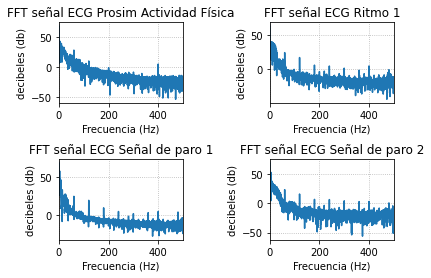

In [19]:
X1 = np.fft.fft(y1) #Transformada de fourier a la primera señal - ECG en Después de actividad física
X1 = np.abs(X1)
X1 = 20 * np.log10(X1)
N1 = len(y1)
f1 = (Fs)*(np.arange(1,N1+1)/N1)

X2 = np.fft.fft(y2) #Transformada de Fourier a la segunda señal - ECG Ritmo 1
X2 = np.abs(X2)
X2 = 20 * np.log10(X2)
N2 = len(y2)
f2 = (Fs)*(np.arange(1,N2+1)/N2)

X3 = np.fft.fft(y3) #Transformada de Fourier a la tercera señal - ECG ritmo de paro 1
X3 = np.abs(X3)
X3 = 20 * np.log10(X3)
N3 = len(y3)
f3 = (Fs)*(np.arange(1,N3+1)/N3)

X4 = np.fft.fft(y4) #Transformada de Fourier a la cuarta señal - ECG ritmo de paro 2
X4 = np.abs(X4)
X4 = 20 * np.log10(X4)
N4 = len(y4)
f4 = (Fs)*(np.arange(1,N4+1)/N4)

#Graficamos las transformadas para ver su comportamiento
plt.figure()
plt.subplot(2,2,1)
plt.subplots_adjust(hspace=0.7, wspace=0.7)
plt.title("FFT señal ECG Prosim Actividad Física")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)") 
plt.ylabel("decibeles (db)")
plt.plot(f1,X1)
plt.xlim((0, Fs/2))


plt.subplot(2,2,2)
plt.title("FFT señal ECG Ritmo 1")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)") 
plt.ylabel("decibeles (db)")
plt.plot(f2,X2)
plt.xlim((0, Fs/2))

plt.subplot(2,2,3)
plt.title("FFT señal ECG Señal de paro 1")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)") 
plt.ylabel("decibeles (db)")
plt.plot(f3,X3)
plt.xlim((0, Fs/2))

plt.subplot(2,2,4)
plt.title("FFT señal ECG Señal de paro 2")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)") 
plt.ylabel("decibeles (db)")
plt.plot(f4,X4)
plt.xlim((0, Fs/2))
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('FFT_ProSim.png', transparent=False, )